#  Supermarket Profit Prediction using Machine Learning


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import io



In [3]:
# Step 1: Load the dataset

df = pd.read_csv('/content/sample_data/superstore_sales_dataset.csv',encoding='latin-1')

# Step 2: Data Preprocessing
selected_columns = ['Sales', 'Discount', 'Quantity', 'Segment', 'Region', 'Category', 'Profit']
df = df[selected_columns]

# Check for missing values
if df.isnull().sum().any():
    print("Missing values detected. Handling missing values...")
    df = df.dropna()





In [4]:
# Step 3: Feature Engineering

# Encode categorical variables
le_segment = LabelEncoder()
df['Segment'] = le_segment.fit_transform(df['Segment'])

le_region = LabelEncoder()
df['Region'] = le_region.fit_transform(df['Region'])

le_category = LabelEncoder()
df['Category'] = le_category.fit_transform(df['Category'])

# Scale numerical features
scaler = StandardScaler()
df[['Sales', 'Discount', 'Quantity']] = scaler.fit_transform(df[['Sales', 'Discount', 'Quantity']])


# Create new features like Profit Margin (Profit/Sales)
df['Profit Margin'] = df['Profit'] / df['Sales']

# Check the new features
df.head()

,Sales,Discount,Quantity,Segment,Region,Category,Profit,Profit Margin
0,0.051510,-0.756643,-0.804303,0,2,0,41.9136,813.691969
1,0.805633,-0.756643,-0.354865,0,2,0,219.5820,272.558186
2,-0.345368,-0.756643,-0.804303,1,3,1,6.8714,-19.895892
3,1.167688,1.423149,0.544012,0,2,0,-383.0310,-328.025085
4,-0.332935,0.212153,-0.804303,0,2,1,2.5164,-7.558222


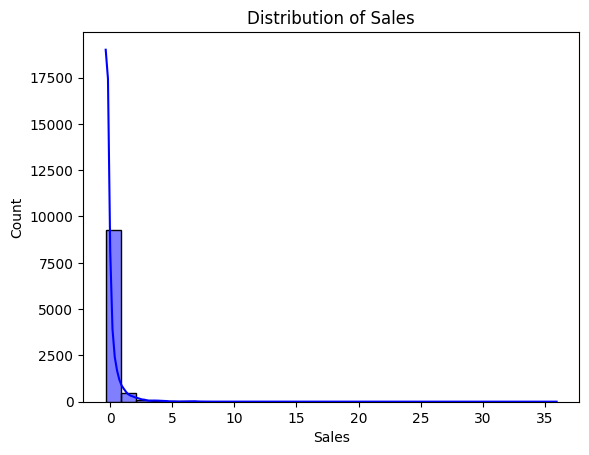

----------------------------------------------------------------------------------------------------


<ipython-input-5-4b9904486c88>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='Set2') #Categorical Columns


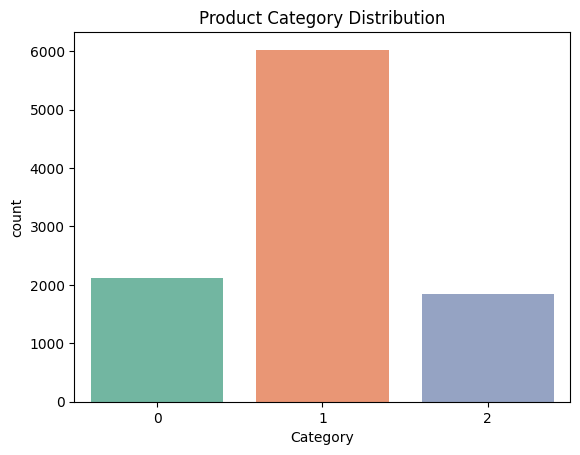

----------------------------------------------------------------------------------------------------


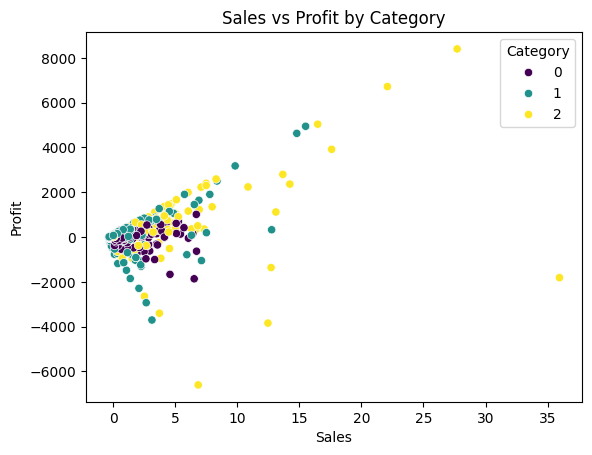

----------------------------------------------------------------------------------------------------


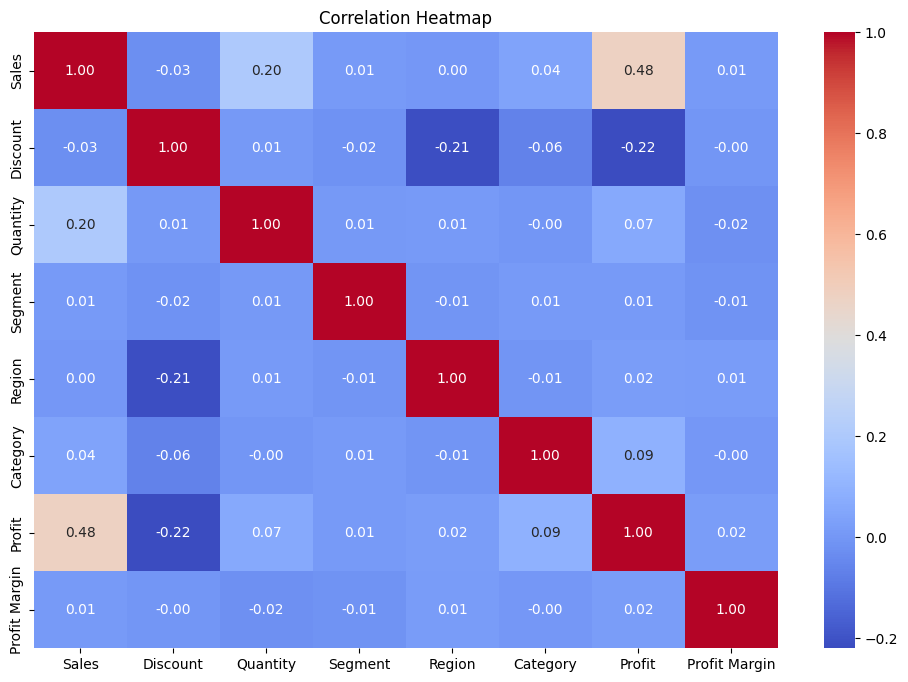

----------------------------------------------------------------------------------------------------


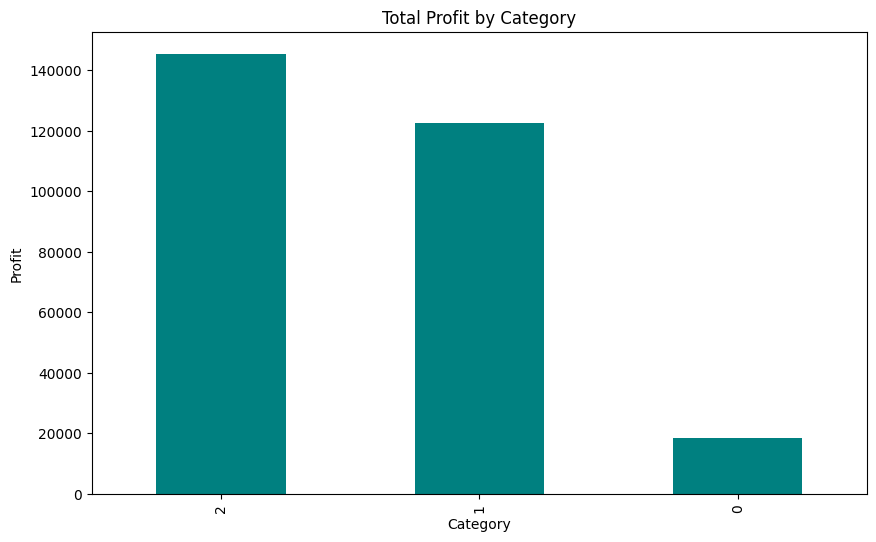

----------------------------------------------------------------------------------------------------


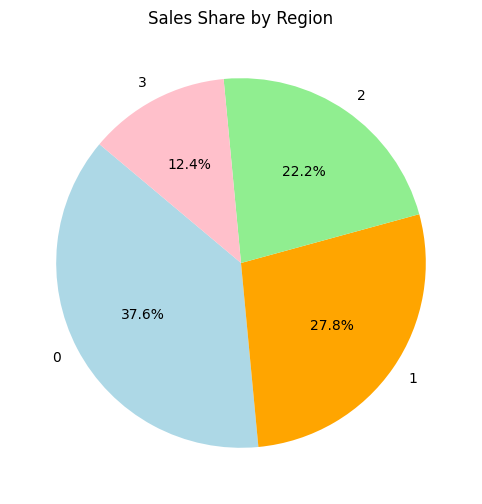

----------------------------------------------------------------------------------------------------


<ipython-input-5-4b9904486c88>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Sales', palette='muted')  #Sales Outliers


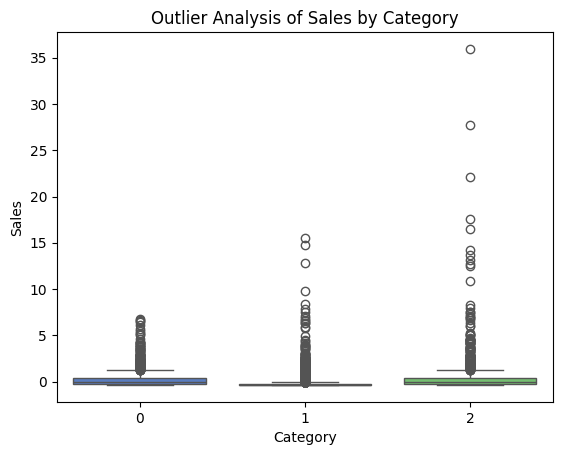

In [5]:
#Exploratory Data Analysis (EDA)
#Univariate Analysis-Analyze individual columns to understand their distribution

# Distribution of Sales
sns.histplot(df['Sales'], kde=True, bins=30, color='blue') #Numerical Columns
plt.title('Distribution of Sales')
plt.show()

print("----------------------------------------------------------------------------------------------------")

# Countplot for Categories
sns.countplot(data=df, x='Category', palette='Set2') #Categorical Columns
plt.title('Product Category Distribution')
plt.show()

print("----------------------------------------------------------------------------------------------------")

#Bivariate Analysis - Explore relationships between two variables
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', palette='viridis') #Sales vs. Profit
plt.title('Sales vs Profit by Category')
plt.show()

print("----------------------------------------------------------------------------------------------------")

#Correlation Analysis - Analyze the relationships between numerical variables
# Select numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])  #Correlation Heatmap

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

print("----------------------------------------------------------------------------------------------------")

#Category-Level Insights - Analyze performance by product category, sub-category, or segment

subcat_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)  #Profit by Category

plt.figure(figsize=(10, 6))
subcat_profit.plot(kind='bar', color='teal')
plt.title('Total Profit by Category')
plt.ylabel('Profit')
plt.show()

print("----------------------------------------------------------------------------------------------------")

#Geographic Insights - Visualize sales and profit trends by region or state

region_sales = df.groupby('Region')['Sales'].sum()    #Sales by Region

region_sales = region_sales.abs()

plt.figure(figsize=(8, 6))
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'orange', 'lightgreen', 'pink'])
plt.title('Sales Share by Region')
plt.ylabel('')
plt.show()

print("----------------------------------------------------------------------------------------------------")

#Anomaly Detection - Identify outliers or unusual trends in the data

sns.boxplot(data=df, x='Category', y='Sales', palette='muted')  #Sales Outliers
plt.title('Outlier Analysis of Sales by Category')
plt.show()

In [6]:
# Step 4: Splitting the data
# Define features and target variable
X = df.drop(columns=['Profit'])
y = df['Profit']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Model Training
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

In [7]:
# Train and evaluate models
results = {}
best_rf_r2 = -1
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

    # Check if this model is the best Random Forest so far
    if model_name == 'Gradient Boosting' and r2 > best_rf_r2:
        best_rf_r2 = r2
        best_rf = model

# Display evaluation results
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']:.2f}, MAE: {metrics['MAE']:.2f}, R2: {metrics['R2']:.2f}")




# Step 4: Model Evaluation
# Predictions for Training and Testing Data
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Calculate Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred) * 100  # Convert R² to percentage
test_r2 = r2_score(y_test, y_test_pred) * 100  # Convert R² to percentage

# Display Results
print("Model Performance:")
print(f"Training Mean Squared Error: {train_mse:.4f}")
print(f"Testing Mean Squared Error: {test_mse:.4f}")
print(f"Training Accuracy: {train_r2:.2f}%")
print(f"Testing Accuracy: {test_r2:.2f}%")

Linear Regression - MSE: 58800.80, MAE: 64.52, R2: -0.10
Random Forest - MSE: 34761.91, MAE: 12.22, R2: 0.35
Gradient Boosting - MSE: 28726.37, MAE: 20.87, R2: 0.46
Decision Tree - MSE: 51696.77, MAE: 16.12, R2: 0.03
Support Vector Regressor - MSE: 54229.72, MAE: 60.93, R2: -0.01
Model Performance:
Training Mean Squared Error: 568.6275
Testing Mean Squared Error: 28726.3743
Training Accuracy: 98.97%
Testing Accuracy: 46.32%


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define the model
gbm = GradientBoostingRegressor(random_state=42)

# Expanded parameter grid
param_grid = {
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
    'n_estimators': [300, 400, 500, 600],
    'max_depth': [5, 6, 7, 8],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'max_features': ['sqrt', 'log2', 0.5, None]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Training R2 Score:", grid_search.best_score_)

# Evaluate the best model on the testing set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate metrics
test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
print("Testing R2 Score:", test_r2)
print("Testing Mean Squared Error:", test_mse)



Fitting 3 folds for each of 1280 candidates, totalling 3840 fits
Best Parameters: {'learning_rate': 0.07, 'max_depth': 6, 'max_features': 0.5, 'n_estimators': 600, 'subsample': 0.6}
Best Training R2 Score: 0.9047371493856661
Testing R2 Score: 0.800329805717114
Testing Mean Squared Error: 10685.384892457474


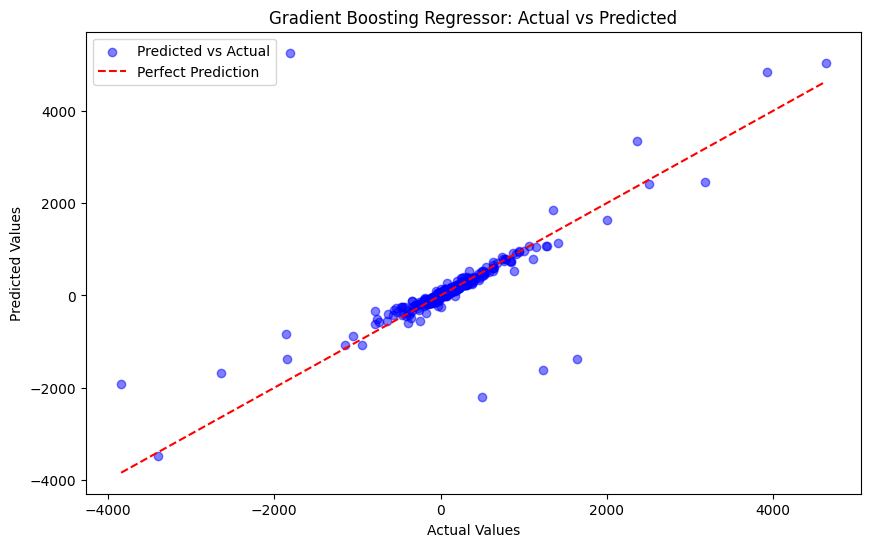

----------------------------------------------------------------------------------------------------


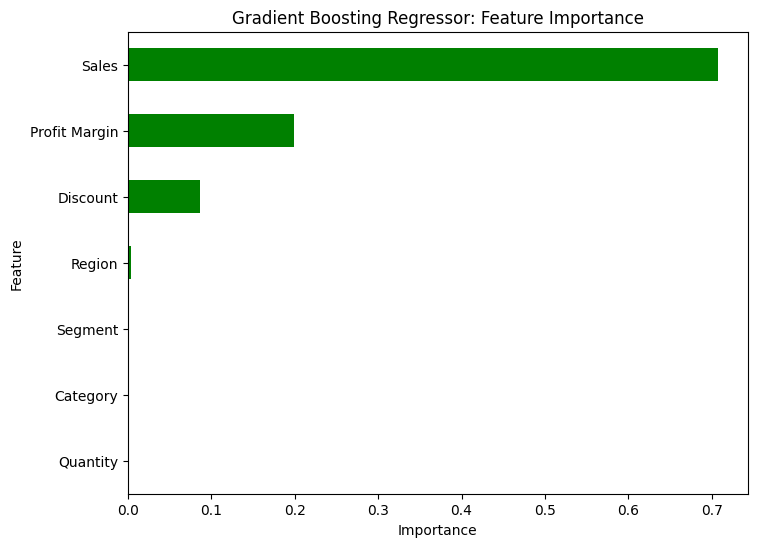

In [8]:
# Actual vs Predicted
# Assign the Gradient Boosting Regressor model to best_gbr
best_gbr = models['Gradient Boosting']  # Access the model from the 'models' dictionary
gbr_predictions = best_gbr.predict(X_test)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gbr_predictions, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting Regressor: Actual vs Predicted')
plt.legend()
plt.show()

print("----------------------------------------------------------------------------------------------------")

# Feature Importance
importance = pd.Series(best_gbr.feature_importances_, index=X.columns)

plt.figure(figsize=(8, 6))
importance.sort_values().plot(kind='barh', color='green')
plt.title('Gradient Boosting Regressor: Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Step 11: Save the Results

# After optimizing the strategy, save the updated dataset
df.to_csv('optimized_sales_data.csv', index=False)
